In [6]:
# lstm model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

# from tensorflow.python.framework import ops
# ops.reset_default_graph()

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import math


from numpy.fft import rfft,irfft,rfftfreq
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# test signal
data = np.loadtxt('../data/test.csv')[0]

#function to filter out frequencies in signal that are above the threshold
def filter_signal(signal, threshold=5e3):
    fourier = rfft(signal)
    frequencies = rfftfreq(signal.size, d=20e-3/signal.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

clean_data = data[:20000]
scaler = MinMaxScaler(feature_range=(0, 5)) #init scaler, scales between 0 and 5
Y_old = scaler.fit_transform(np.asarray([i for i in range(len(clean_data)+1)]).reshape(-1,1)) #generate supervised output data

actions = np.asarray([filter_signal(clean_data)[:4001]]) #X - equivalent to actions
states = np.asarray(Y_old[:4001].copy()).T #Y - equivalent to states

x = np.asarray([actions[0][:4001]])
x = x.T

y = np.asarray([states[0][:4001]])
y = y.T

In [8]:
x.shape, y.shape

((4001, 1), (4001, 1))

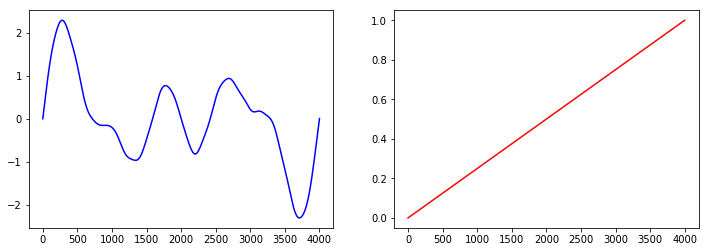

In [9]:
fig = plt.figure(figsize=(12,4))
a = plt.subplot(1,2,1)
plt.plot(x.flatten(),c='b')
a = plt.subplot(1,2,2)
plt.plot(y.flatten(),c='r')
plt.show()

In [29]:
trainX = np.array([np.array([x[:,0]])]).T
trainY = y[:,0]

In [30]:
# np.array([np.array([x[:,0]])]).T.shape

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
4001/4001 - 8s - loss: 0.0674
Epoch 2/10
4001/4001 - 7s - loss: 0.0577
Epoch 3/10
4001/4001 - 7s - loss: 0.0559
Epoch 4/10
4001/4001 - 7s - loss: 0.0522
Epoch 5/10
4001/4001 - 7s - loss: 0.0499
Epoch 6/10
4001/4001 - 9s - loss: 0.0492
Epoch 7/10
4001/4001 - 8s - loss: 0.0489
Epoch 8/10
4001/4001 - 8s - loss: 0.0488
Epoch 9/10


In [ ]:
from sklearn.metrics import mean_squared_error

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: ',trainScore)
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: ',testScore)

In [ ]:
import matplotlib.pyplot as plt

# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,8))
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()